<a href="https://colab.research.google.com/github/sunjana2199/ML-Climate-Final-Project-Template/blob/main/src/Twitter/Topic_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Dependencies

In [494]:
import pandas as pd
import numpy as np
import string
import nltk
import re
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [495]:
import nltk
nltk.download('punkt')
# from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [496]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [497]:
import matplotlib.pyplot as plt
import seaborn as sns

In [498]:
import warnings
warnings.filterwarnings("ignore")

# Text Peprocessing

##Stop Words

In [499]:
import string
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

#add punctuation char's to stopwords list
stop_words += list(string.punctuation) # <-- contains !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~

#add integers
stop_words += ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

stop_words += ['new' , 'york', 'near', 'nyc', 'city' , 'newyork', 'ny', 'nytimes', 'state', 'time', 'today', 'tomorrow', 'like']

In [500]:
import spacy
#loading the english language small model of spacy
en = spacy.load('en_core_web_sm')
sw_spacy = en.Defaults.stop_words
print(sw_spacy)

{'would', 'namely', 'could', 'in', 'latter', 'ourselves', 'yours', 'become', 'throughout', 'a', 'whereupon', 'other', 'move', 'down', 'whatever', 'should', 'seemed', 'when', 'had', '‘ll', 'your', 'ca', 'us', 'whether', 'whereafter', 'him', 'for', '‘d', 'at', 'themselves', 'sometimes', 'am', 'all', 'over', 'eight', 'show', 'by', 'each', 'will', 'five', 'too', 'to', 'with', 'somehow', 'rather', 'however', 'seems', 'may', 'no', 'various', 'side', 'already', 'both', 'into', 'take', 'wherever', 'becoming', 'say', 'toward', 'third', 'quite', 'anyhow', "'m", 'against', 'until', 'ten', 'hers', 'also', 'anywhere', 'give', 'still', 'whereby', 'the', 'least', 'neither', 'this', 'who', 'many', 'beside', 'therefore', 'either', "n't", 'none', 'himself', '’ve', 'we', 'must', 'across', 'done', 'some', 'besides', 'above', 'much', 'using', '‘s', 'within', 'keep', 'six', 'never', 'sixty', 'n‘t', 'my', 'few', 'perhaps', 'upon', 'back', 'full', 'not', 'mine', 'an', 're', 'can', 'have', 'just', 'from', 'eve

In [501]:
stop_words += sw_spacy

##Tokenizing

In [502]:
def tokenize_lowercase(text):
    tokens = word_tokenize(text)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stop_words]
    # stopwords_removed = [token.lower() for token in tokens if token.lower() not in stop_words]
    return stopwords_removed

##Removing noise

In [503]:
def remove_nums(text_object):
    no_nums = list(filter(lambda x: x.isalpha(), text_object))
    return no_nums


##Lemmatization

In [504]:
from nltk.stem import WordNetLemmatizer


In [505]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(df_text):
    lemmatized =[]
    for w in df_text:
        lemmatized.append(lemmatizer.lemmatize(w))
    return lemmatized

## Data Preprocessing

In [506]:
df = pd.read_csv('/content/bottom_anomaly_twitter_data.csv')
df2 = pd.read_csv('/content/top_anomaly_twitter_data.csv')

In [507]:
df.head()

,Unnamed: 0,text,date,Tweet Id
0,0,If you live near New York's La Guardia Airport...,2015-10-04 23:54:01+00:00,650821202676719616
1,1,.@Space_Station Hello #ISS from New York City ...,2015-10-04 23:27:07+00:00,650814435032875008
2,2,@myitalianangels @joshcometomexic @joshgroban ...,2015-10-04 23:04:48+00:00,650808820478930944
3,3,"really ⁉.. from 2014⏬\n\n""Half Of New York Cit...",2015-10-04 22:58:17+00:00,650807179230998528
4,4,@JazzyBonesJones by train yeah. I live in NYS ...,2015-10-04 21:28:19+00:00,650784536855474176


In [508]:
#Remove urls from text

df['text'] = df['text'].str.replace(r"http\S+", "")
df2['text'] = df2['text'].str.replace(r"http\S+", "")


In [509]:
# TOKENIZE TEXT

df['text'] = df['text'].apply(tokenize_lowercase)
df2['text'] = df2['text'].apply(tokenize_lowercase)

In [510]:
#removing numbers from dfs

df['text'] = df['text'].apply(remove_nums)
df2['text'] = df2['text'].apply(remove_nums)


In [511]:
# Lemmatize text

df['text'] = df['text'].apply(lemmatize_text)
df2['text'] = df2['text'].apply(lemmatize_text)

#EDA

In [512]:
df.head()

,Unnamed: 0,text,date,Tweet Id
0,0,"[live, la, guardia, airport, talk]",2015-10-04 23:54:01+00:00,650821202676719616
1,1,"[hello, i, central, park, mi, away, issabove]",2015-10-04 23:27:07+00:00,650814435032875008
2,2,"[myitalianangels, joshcometomexic, joshgroban,...",2015-10-04 23:04:48+00:00,650808820478930944
3,3,"[half, living, poverty, cc, michaeljaco]",2015-10-04 22:58:17+00:00,650807179230998528
4,4,"[jazzybonesjones, train, yeah, live, ny, live,...",2015-10-04 21:28:19+00:00,650784536855474176


In [513]:
df2.head()

,Unnamed: 0,text,date,Tweet Id
0,0,"[taylorklainer, lucky, omg, lived, totally, li...",2015-07-20 23:32:47+00:00,623274383952351232
1,1,"[love, glimpse, lt, background, wing, skyline]",2015-07-20 22:57:53+00:00,623265602048774144
2,2,"[mac, window, system, admin, job, active, dire...",2015-07-20 21:37:11+00:00,623245289973940224
3,3,"[cloudsteph, candlewood, suite, time, square, ...",2015-07-20 21:31:31+00:00,623243867555516421
4,4,"[hour, close, come, hang, babysallright, party]",2015-07-20 21:22:34+00:00,623241614350127104


In [514]:
all_words = [word for tokens in df['text'] for word in tokens]
tweet_lengths = [len(tokens) for tokens in df['text']]
vocab = sorted(list(set(all_words)))

print('{} words total, with a vocabulary size of {}'.format(len(all_words), len(vocab)))
print('Max tweet length in Bottom Anomaly words is {}'.format(max(tweet_lengths)))
print('Max tweet length in Bottom anomaly words is {}'.format(min(tweet_lengths)))

43736 words total, with a vocabulary size of 12480
Max tweet length in Bottom Anomaly words is 62
Max tweet length in Bottom anomaly words is 0


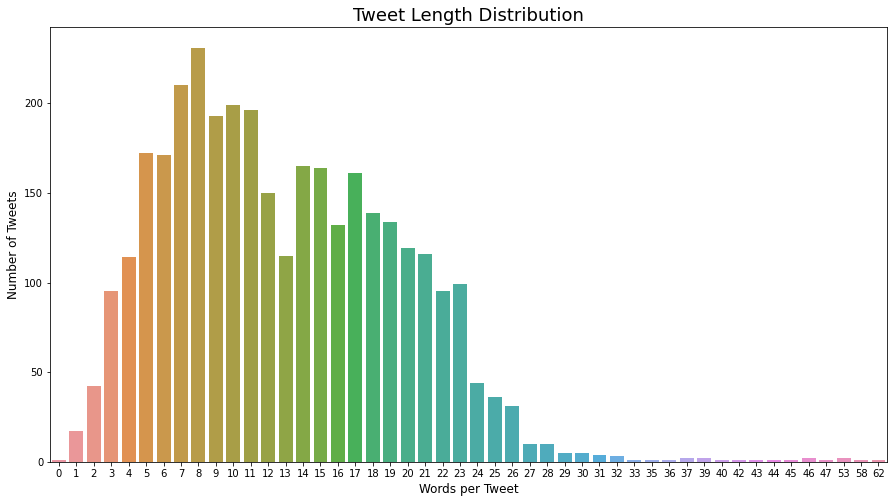

In [515]:
plt.figure(figsize = (15,8))
sns.countplot(tweet_lengths)
plt.title('Tweet Length Distribution', fontsize = 18)
plt.xlabel('Words per Tweet', fontsize = 12)
plt.ylabel('Number of Tweets', fontsize = 12)
plt.show()

In [516]:
all_words = [word for tokens in df2['text'] for word in tokens]
tweet_lengths = [len(tokens) for tokens in df2['text']]
vocab = sorted(list(set(all_words)))


print('{} words total, with a vocabulary size of {}'.format(len(all_words), len(vocab)))
print('Max tweet length in Top anomaly words is {}'.format(max(tweet_lengths)))
print('Min tweet length in Top anomaly words is {}'.format(min(tweet_lengths)))

58690 words total, with a vocabulary size of 14360
Max tweet length in Top anomaly words is 50
Min tweet length in Top anomaly words is 0


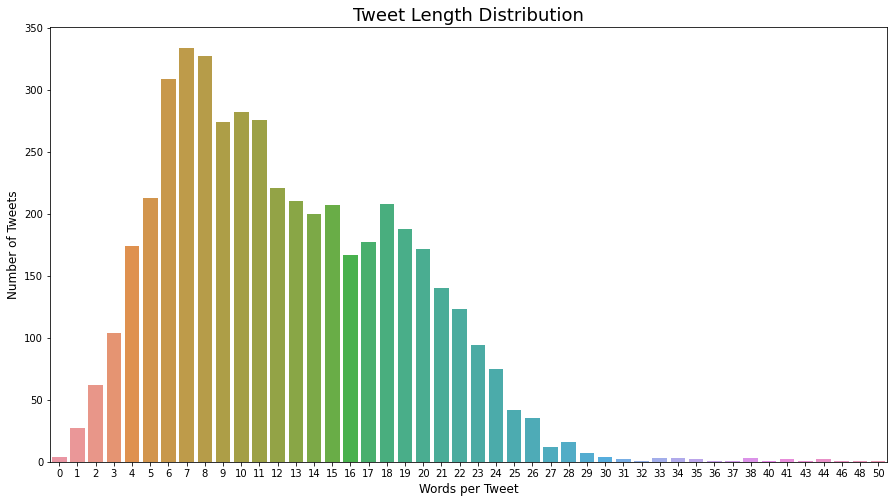

In [517]:
plt.figure(figsize = (15,8))
sns.countplot(tweet_lengths)
plt.title('Tweet Length Distribution', fontsize = 18)
plt.xlabel('Words per Tweet', fontsize = 12)
plt.ylabel('Number of Tweets', fontsize = 12)
plt.show()

##WordCloud for Bottom Quartiles

In [518]:
from nltk.probability import FreqDist

#iterate through each tweet, then each token in each tweet, and store in one list
flat_words = [item for sublist in df['text'] for item in sublist]

word_freq = FreqDist(flat_words)

word_freq.most_common(50)

[('time', 273),
 ('people', 254),
 ('live', 244),
 ('amp', 243),
 ('death', 157),
 ('know', 145),
 ('day', 142),
 ('year', 123),
 ('want', 114),
 ('trump', 112),
 ('end', 109),
 ('good', 109),
 ('life', 107),
 ('train', 106),
 ('right', 103),
 ('future', 103),
 ('park', 101),
 ('need', 99),
 ('damn', 98),
 ('think', 97),
 ('street', 94),
 ('place', 91),
 ('look', 90),
 ('coming', 88),
 ('love', 88),
 ('got', 88),
 ('find', 87),
 ('going', 85),
 ('come', 84),
 ('square', 83),
 ('said', 81),
 ('news', 80),
 ('coronavirus', 79),
 ('week', 76),
 ('case', 75),
 ('man', 74),
 ('found', 73),
 ('home', 72),
 ('police', 71),
 ('number', 69),
 ('shooting', 67),
 ('friend', 67),
 ('house', 66),
 ('manhattan', 65),
 ('great', 65),
 ('island', 65),
 ('way', 64),
 ('east', 64),
 ('border', 64),
 ('seen', 63)]

In [519]:
most_common_count = [x[1] for x in word_freq.most_common(30)]
most_common_word = [x[0] for x in word_freq.most_common(30)]

#create dictionary mapping of word count
top_30_dictionary = dict(zip(most_common_word, most_common_count))

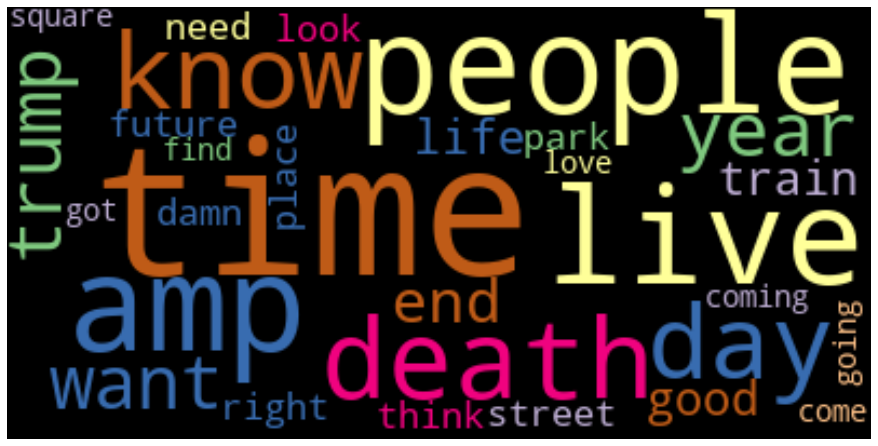

In [520]:
from wordcloud import WordCloud

#Create Word Cloud of top 30 words
wordcloud = WordCloud(colormap = 'Accent', background_color = 'black')\
.generate_from_frequencies(top_30_dictionary)

#plot with matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('top_30_cloud.png')

plt.show()

###Bag of Words

In [521]:
from gensim.corpora import Dictionary

#create dictionary
text_dict = Dictionary(df.text)

#view integer mappings
text_dict.token2id

{'airport': 0,
 'guardia': 1,
 'la': 2,
 'live': 3,
 'talk': 4,
 'away': 5,
 'central': 6,
 'hello': 7,
 'i': 8,
 'issabove': 9,
 'mi': 10,
 'park': 11,
 'angeles': 12,
 'joshcometomexic': 13,
 'joshgroban': 14,
 'margaritha': 15,
 'myitalianangels': 16,
 'usa': 17,
 'cc': 18,
 'half': 19,
 'living': 20,
 'michaeljaco': 21,
 'poverty': 22,
 'as': 23,
 'big': 24,
 'canada': 25,
 'jazzybonesjones': 26,
 'lol': 27,
 'ny': 28,
 'train': 29,
 'yeah': 30,
 'bycherylcosta': 31,
 'circular': 32,
 'ethan': 33,
 'gray': 34,
 'motorist': 35,
 'report': 36,
 'ufo': 37,
 'watertown': 38,
 'amp': 39,
 'came': 40,
 'confirms': 41,
 'convenient': 42,
 'dead': 43,
 'fled': 44,
 'impd': 45,
 'man': 46,
 'pm': 47,
 'rural': 48,
 'shot': 49,
 'store': 50,
 'street': 51,
 'suspect': 52,
 'bc': 53,
 'christmas': 54,
 'fairytale': 55,
 'im': 56,
 'listening': 57,
 'mum': 58,
 'screaming': 59,
 'turn': 60,
 'apartment': 61,
 'manhattan': 62,
 'mark': 63,
 'price': 64,
 'time': 65,
 'airbnb': 66,
 'battery': 6

In [522]:
tweets_bow = [text_dict.doc2bow(tweet) for tweet in df['text']]

In [523]:
tweets_bow

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)],
 [(5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)],
 [(12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1)],
 [(18, 1), (19, 1), (20, 1), (21, 1), (22, 1)],
 [(3, 2),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1)],
 [(31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1)],
 [(39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1)],
 [(53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1)],
 [(36, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1)],
 [(36, 1), (61, 1), (62, 1), (63, 1), (64, 1)],
 [(11, 1), (51, 1), (61, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1)],
 [(6, 1), (11, 1), (62, 1), (71, 1), (72, 1), (73, 1), (74, 1)],
 [(75, 1), (76, 1), (77, 1)],
 [(78, 1), (79, 1), (80, 1), (81, 1), (82, 1)],
 [(83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1)],
 [(89, 

###LDA

In [524]:
from gensim.models.ldamodel import LdaModel

k = 5
tweets_lda = LdaModel(tweets_bow,
                      num_topics = k,
                      id2word = text_dict,
                      random_state = 1,
                      passes=10)

tweets_lda.show_topics()

[(0,
  '0.005*"people" + 0.005*"country" + 0.004*"border" + 0.004*"love" + 0.004*"place" + 0.003*"time" + 0.003*"close" + 0.003*"live" + 0.003*"number" + 0.003*"going"'),
 (1,
  '0.006*"death" + 0.005*"day" + 0.004*"good" + 0.004*"live" + 0.004*"degree" + 0.004*"case" + 0.004*"news" + 0.004*"time" + 0.004*"central" + 0.003*"right"'),
 (2,
  '0.012*"time" + 0.009*"people" + 0.007*"death" + 0.007*"amp" + 0.005*"page" + 0.005*"square" + 0.005*"police" + 0.005*"end" + 0.004*"shooting" + 0.004*"loss"'),
 (3,
  '0.008*"train" + 0.007*"amp" + 0.005*"people" + 0.005*"trump" + 0.004*"dog" + 0.004*"lost" + 0.003*"derails" + 0.003*"want" + 0.003*"live" + 0.003*"east"'),
 (4,
  '0.009*"live" + 0.005*"amp" + 0.005*"year" + 0.004*"life" + 0.004*"time" + 0.004*"dead" + 0.004*"people" + 0.003*"think" + 0.003*"future" + 0.003*"know"')]

In [525]:
!pip install pyLDAvis

In [526]:
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim_models.prepare(tweets_lda, tweets_bow, dictionary=tweets_lda.id2word)


In [527]:
pyLDAvis.save_html(vis, 'bottom_lda.html')

##WordCloud for Top Quartiles

In [528]:
all_words = [word for tokens in df2['text'] for word in tokens]
tweet_lengths = [len(tokens) for tokens in df2['text']]
vocab = sorted(list(set(all_words)))


print('{} words total, with a vocabulary size of {}'.format(len(all_words), len(vocab)))
print('Max tweet length in Top anomaly words is {}'.format(max(tweet_lengths)))
print('Min tweet length in Top anomaly words is {}'.format(min(tweet_lengths)))

58690 words total, with a vocabulary size of 14360
Max tweet length in Top anomaly words is 50
Min tweet length in Top anomaly words is 0


In [529]:
from nltk.probability import FreqDist

#iterate through each tweet, then each token in each tweet, and store in one list
flat_words = [item for sublist in df2['text'] for item in sublist]

word_freq = FreqDist(flat_words)

word_freq.most_common(50)

[('time', 319),
 ('live', 302),
 ('people', 292),
 ('amp', 280),
 ('mosque', 207),
 ('imam', 196),
 ('day', 176),
 ('future', 167),
 ('killed', 166),
 ('year', 162),
 ('find', 155),
 ('trump', 154),
 ('know', 153),
 ('coming', 145),
 ('man', 144),
 ('park', 143),
 ('brooklyn', 141),
 ('home', 133),
 ('going', 130),
 ('right', 129),
 ('shooting', 129),
 ('damn', 125),
 ('shot', 124),
 ('police', 124),
 ('assistant', 124),
 ('place', 123),
 ('death', 121),
 ('said', 120),
 ('come', 117),
 ('think', 116),
 ('end', 113),
 ('want', 112),
 ('street', 112),
 ('life', 109),
 ('found', 109),
 ('area', 106),
 ('center', 105),
 ('way', 102),
 ('good', 101),
 ('border', 99),
 ('island', 99),
 ('station', 97),
 ('news', 97),
 ('east', 96),
 ('family', 93),
 ('look', 93),
 ('house', 92),
 ('woman', 91),
 ('love', 89),
 ('lake', 89)]

In [530]:
most_common_count = [x[1] for x in word_freq.most_common(30)]
most_common_word = [x[0] for x in word_freq.most_common(30)]

#create dictionary mapping of word count
top_30_dictionary = dict(zip(most_common_word, most_common_count))

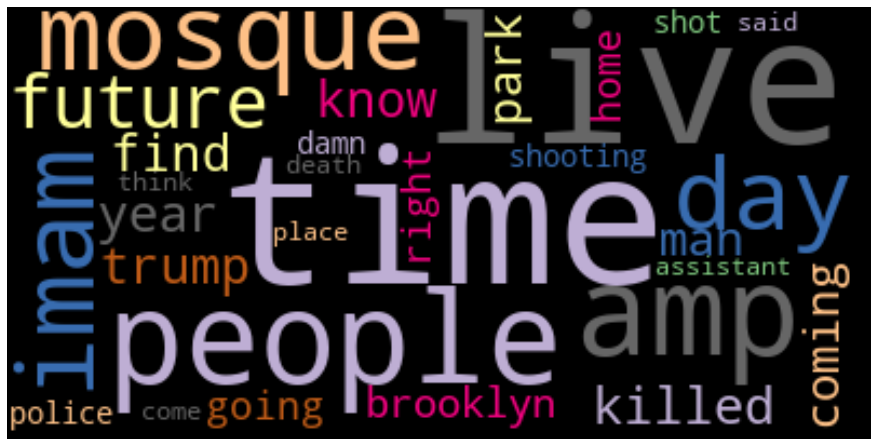

In [531]:
from wordcloud import WordCloud

#Create Word Cloud of top 30 words
wordcloud = WordCloud(colormap = 'Accent', background_color = 'black')\
.generate_from_frequencies(top_30_dictionary)

#plot with matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('top_30_cloud.png')

plt.show()

###Bag of words

In [532]:
from gensim.corpora import Dictionary

#create dictionary
text_dict = Dictionary(df.text)

#view integer mappings
text_dict.token2id

{'airport': 0,
 'guardia': 1,
 'la': 2,
 'live': 3,
 'talk': 4,
 'away': 5,
 'central': 6,
 'hello': 7,
 'i': 8,
 'issabove': 9,
 'mi': 10,
 'park': 11,
 'angeles': 12,
 'joshcometomexic': 13,
 'joshgroban': 14,
 'margaritha': 15,
 'myitalianangels': 16,
 'usa': 17,
 'cc': 18,
 'half': 19,
 'living': 20,
 'michaeljaco': 21,
 'poverty': 22,
 'as': 23,
 'big': 24,
 'canada': 25,
 'jazzybonesjones': 26,
 'lol': 27,
 'ny': 28,
 'train': 29,
 'yeah': 30,
 'bycherylcosta': 31,
 'circular': 32,
 'ethan': 33,
 'gray': 34,
 'motorist': 35,
 'report': 36,
 'ufo': 37,
 'watertown': 38,
 'amp': 39,
 'came': 40,
 'confirms': 41,
 'convenient': 42,
 'dead': 43,
 'fled': 44,
 'impd': 45,
 'man': 46,
 'pm': 47,
 'rural': 48,
 'shot': 49,
 'store': 50,
 'street': 51,
 'suspect': 52,
 'bc': 53,
 'christmas': 54,
 'fairytale': 55,
 'im': 56,
 'listening': 57,
 'mum': 58,
 'screaming': 59,
 'turn': 60,
 'apartment': 61,
 'manhattan': 62,
 'mark': 63,
 'price': 64,
 'time': 65,
 'airbnb': 66,
 'battery': 6

In [533]:
tweets_bow = [text_dict.doc2bow(tweet) for tweet in df2['text']]
tweets_bow

[[(3, 1), (309, 1), (568, 1), (989, 1), (1073, 1), (7364, 1)],
 [(122, 1), (1351, 1), (2281, 1), (9988, 1), (10001, 1), (10890, 1)],
 [(199, 2),
  (1264, 1),
  (1294, 1),
  (2083, 1),
  (2111, 1),
  (3194, 1),
  (3894, 1),
  (9393, 1)],
 [(39, 1),
  (65, 2),
  (124, 1),
  (173, 1),
  (881, 1),
  (1136, 1),
  (1530, 1),
  (2878, 1),
  (4190, 1),
  (7198, 1)],
 [(401, 1), (438, 1), (551, 1), (1013, 1), (2291, 1)],
 [],
 [(65, 1),
  (334, 1),
  (649, 1),
  (918, 2),
  (943, 1),
  (1484, 1),
  (1495, 1),
  (2294, 1),
  (6872, 1)],
 [(200, 1), (326, 1), (714, 1), (918, 1), (3302, 1)],
 [(62, 1), (173, 1), (203, 1), (588, 1), (1753, 1), (4980, 1), (12153, 1)],
 [(780, 1), (2766, 1), (3010, 1), (5103, 1), (6356, 1), (6958, 1)],
 [(415, 2),
  (583, 1),
  (643, 1),
  (645, 1),
  (652, 1),
  (718, 1),
  (7406, 1),
  (7741, 1)],
 [(65, 1),
  (334, 1),
  (649, 1),
  (918, 2),
  (943, 1),
  (1484, 1),
  (1495, 1),
  (2294, 1),
  (6872, 1)],
 [(187, 1), (1532, 1), (1675, 1), (1707, 1)],
 [(326, 1), 

###LDA

In [534]:
from gensim.models.ldamodel import LdaModel

k = 5
tweets_lda = LdaModel(tweets_bow,
                      num_topics = k,
                      id2word = text_dict,
                      random_state = 1,
                      passes=10)

tweets_lda.show_topics()

[(0,
  '0.007*"year" + 0.006*"coming" + 0.006*"chicago" + 0.006*"going" + 0.006*"central" + 0.005*"area" + 0.005*"people" + 0.005*"live" + 0.005*"world" + 0.005*"place"'),
 (1,
  '0.007*"life" + 0.007*"station" + 0.006*"death" + 0.006*"service" + 0.005*"train" + 0.005*"amp" + 0.005*"time" + 0.005*"child" + 0.005*"penn" + 0.005*"trump"'),
 (2,
  '0.011*"police" + 0.010*"time" + 0.009*"park" + 0.008*"shot" + 0.008*"seen" + 0.007*"amp" + 0.007*"killed" + 0.007*"mosque" + 0.006*"street" + 0.006*"site"'),
 (3,
  '0.010*"brooklyn" + 0.008*"time" + 0.007*"man" + 0.006*"store" + 0.006*"ave" + 0.006*"killing" + 0.006*"heat" + 0.005*"shooting" + 0.005*"friday" + 0.005*"found"'),
 (4,
  '0.013*"live" + 0.012*"people" + 0.007*"future" + 0.006*"amp" + 0.006*"know" + 0.006*"damn" + 0.006*"state" + 0.005*"lot" + 0.005*"find" + 0.005*"day"')]

In [535]:
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim_models.prepare(tweets_lda, tweets_bow, dictionary=tweets_lda.id2word)

In [536]:
pyLDAvis.save_html(vis, 'top_lda.html')